In [1]:
import json
import os

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
%matplotlib inline

In [2]:
from learning import *

In [3]:
THOUSAND = 1000
MILLION = 1000000

In [4]:
def get_plot_path(versions, ftype):
    return 'tests/v{}_vs_v{}/vplot.{}'.format(versions[0], versions[1], ftype)

In [7]:
versions = (1, 15)

In [5]:
name1 = 'dqn1_5b5_3216_adam_lr0.001_tmu0.01_ml50K_ns5M_eps0.1'
nb_episodes1 = 10*THOUSAND
name2 = 'dqn15_5b5_3216_adam_lr0.001_tmu0.01_ml50K_ns5M_eps0.1'
nb_episodes2 = 10*THOUSAND

In [6]:
rewards1 = np.loadtxt(get_test_path(name1, nb_episodes1))
rewards2 = np.loadtxt(get_test_path(name2, nb_episodes2))

## Violin plot ##

https://matplotlib.org/stable/gallery/statistics/customized_violin.html#sphx-glr-gallery-statistics-customized-violin-py

In [24]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

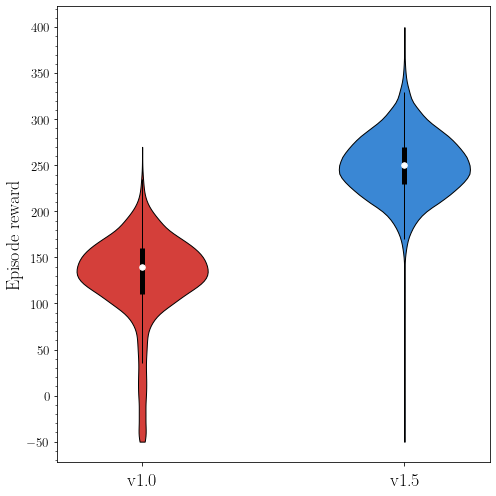

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))

data = (rewards1, rewards2)

parts = ax.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

parts['bodies'][0].set_facecolor('#D43F3A')
parts['bodies'][0].set_edgecolor('black')
parts['bodies'][0].set_alpha(1)

parts['bodies'][1].set_facecolor('#3a87d4')
parts['bodies'][1].set_edgecolor('black')
parts['bodies'][1].set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(np.sort(arr), q1, q3)
    for arr, q1, q3 in zip(data, quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax.vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)

ax.set_xticks(np.arange(1, len(data) + 1))
ax.set_xticklabels(('v1.0', 'v1.5'))

ax.set_ylabel(r'Episode reward', fontsize=18)

ax.yaxis.set_major_locator(MultipleLocator(50))
#ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(10))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax.xaxis.set_tick_params(pad=7)
    
fig.tight_layout()

fig.savefig(get_plot_path(versions, 'jpg'))

plt.show()